In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings as warn
import pandas as pd
warn.filterwarnings('ignore')
%matplotlib inline

In [315]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [316]:
#movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings', 'BudgetMillions', 'YearOfRelease']
movies['Genre'] = movies['Genre'].astype('category')
movies['Year of release'] = movies['Year of release'].astype('category')
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


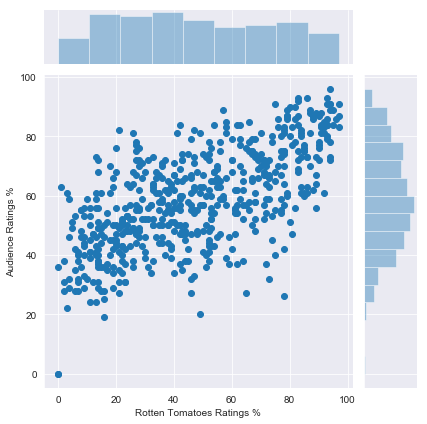

In [317]:
sns.set_style('darkgrid')
joint_plot = sns.jointplot(data=movies, x='Rotten Tomatoes Ratings %', y='Audience Ratings %')

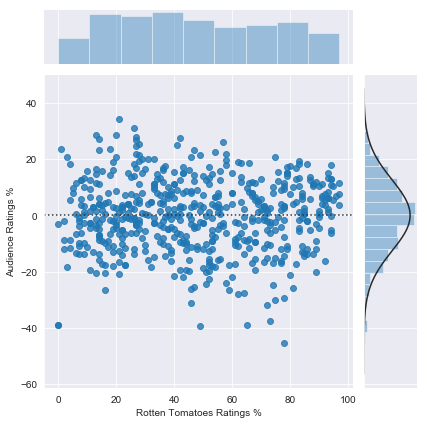

In [318]:
joint_plot_hex = sns.jointplot(data=movies, x='Rotten Tomatoes Ratings %', y='Audience Ratings %', kind='resid')

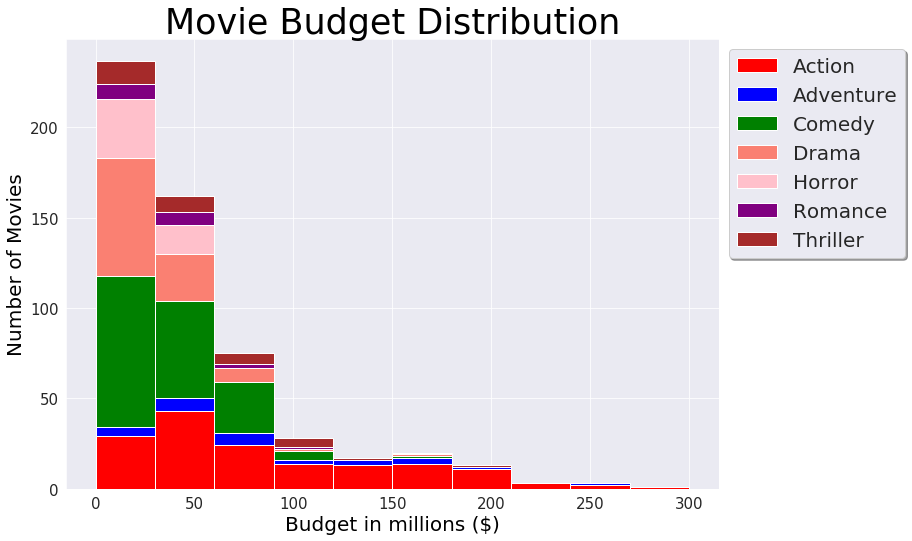

In [384]:
budgetMillionsByGenre = []
for genre in movies['Genre'].cat.categories:
    budgetMillionsByGenre.append(movies[movies['Genre'] == genre]['Budget (million $)'])

sns.set_style('darkgrid')

#If no arguments passed into subplot then it creates 1 plot inside by default
f,axes = plt.subplots()
f.set_size_inches(11.7, 8.27) #A4 size

#If color argument not passed random colours are set everytime its run
plt.hist(budgetMillionsByGenre, stacked=True, label=list(movies['Genre'].cat.categories), color=['Red', 'Blue', 'Green', 'Salmon', 'Pink', 'Purple', 'Brown'])
plt.title('Movie Budget Distribution', fontsize=35, color='Black', fontname='Calibri body')

plt.ylabel('Number of Movies', fontsize=20, color='Black', fontname='Calibri body')
for tick in axes.get_yticklabels():
    tick.set_fontname("Calibri body")
    tick.set_fontsize(15)

plt.xlabel('Budget in millions ($)', fontsize=20, color='Black', fontname='Calibri body')
for tick in axes.get_xticklabels():
    tick.set_fontname("Calibri body")
    tick.set_fontsize(15)

plt.legend(loc=2,bbox_to_anchor=(1,1), prop={'size':20, 'family':'Calibri body'}, frameon=True, framealpha=1, shadow=True)
plt.show()

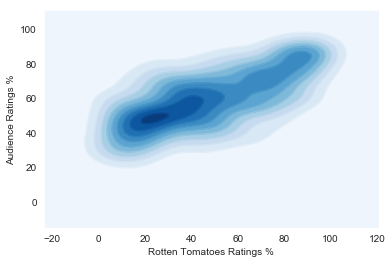

In [320]:
kdePlot = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], shade=True, shade_lowest=True, cmap='Blues')
kdePlot = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], cmap='Blues')


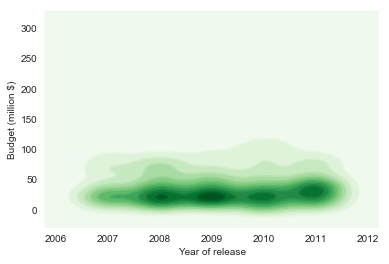

In [321]:
kdePlot2 = sns.kdeplot(movies['Year of release'], movies['Budget (million $)'], cmap='Greens')
kdePlot2 = sns.kdeplot(movies['Year of release'], movies['Budget (million $)'], shade=True, shade_lowest=True, cmap='Greens')


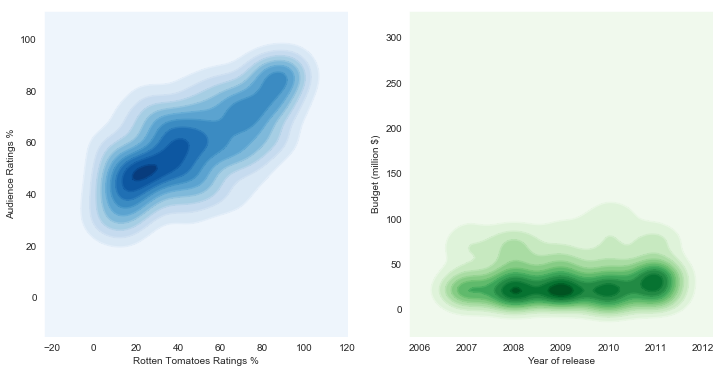

In [322]:
f,axes = plt.subplots(1,2, figsize=(12,6))

kdePlot = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], shade=True, shade_lowest=True, cmap='Blues', ax=axes[0])
kdePlot = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], cmap='Blues', ax=axes[0])

kdePlot2 = sns.kdeplot(movies['Year of release'], movies['Budget (million $)'], cmap='Greens', ax=axes[1])
kdePlot2 = sns.kdeplot(movies['Year of release'], movies['Budget (million $)'], shade=True, shade_lowest=True, cmap='Greens', ax=axes[1])


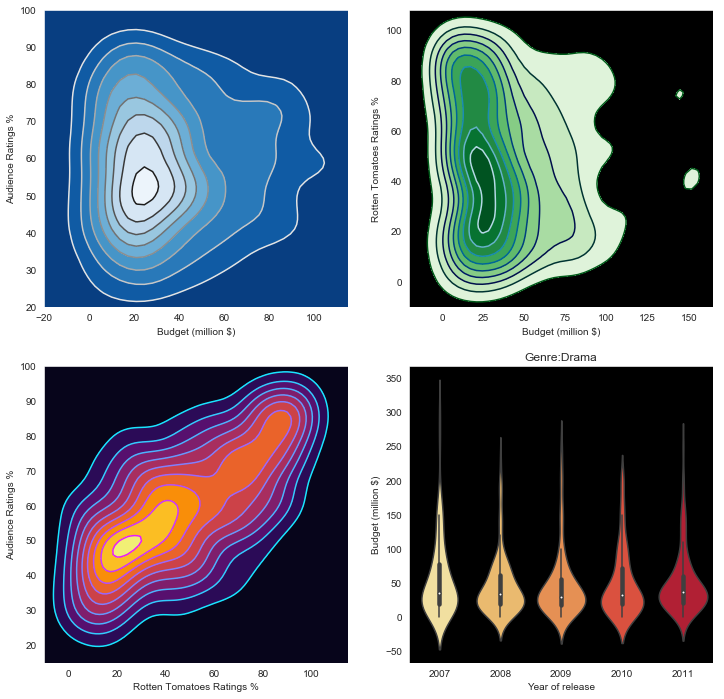

In [378]:
#kde = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)
#f,axes = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

#kdePlot2 = sns.kdeplot(movies['Year of release'], movies['Budget (million $)'], cmap='Greens', ax=axes[1,1])
#kdePlot2 = sns.kdeplot(movies['Year of release'], movies['Budget (million $)'], shade=True, shade_lowest=True, cmap='Greens', ax=axes[1,1])

sns.set_style("dark", {"axes.facecolor":"black"})

#Building dashboards using subplots
f,axes = plt.subplots(2,2, figsize=(12,12))

#plot [0,0]
kde1 = sns.kdeplot(movies['Budget (million $)'], movies['Audience Ratings %'], ax=axes[0,0], shade=True, shade_lowest=True, cmap='Blues_r')
kde1b = sns.kdeplot(movies['Budget (million $)'], movies['Audience Ratings %'], ax=axes[0,0], cmap='gist_gray_r')
kde1.set(xlim=(-20,115), ylim=(20,100))

#plot [0,1]
kde2 = sns.kdeplot(movies['Budget (million $)'], movies['Rotten Tomatoes Ratings %'], ax=axes[0,1], shade=True, shade_lowest=False, cmap='Greens')
kde2b = sns.kdeplot(movies['Budget (million $)'], movies['Rotten Tomatoes Ratings %'], ax=axes[0,1], cmap='ocean')
kde2.set(xlim=(-20,165), ylim=(-10,108))

#plot [1,0]
kde3 = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], ax=axes[1,0], shade=True, shade_lowest=True, cmap='inferno')
kde3b = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'],  ax=axes[1,0], cmap='cool')
kde3.set(xlim=(-10,115), ylim=(15,100))

#plot[1,1]
violinPlot = sns.violinplot(data=movies, x='Year of release', y='Budget (million $)', ax=axes[1,1], palette='YlOrRd')
violinPlot.title.set_text('Genre:Drama')

#For non seaborn graphs have apply plt or other function to the subplot location
#axes[1,1].hist(movies[movies['Genre'] == genre]['Budget (million $)'])

plt.show()


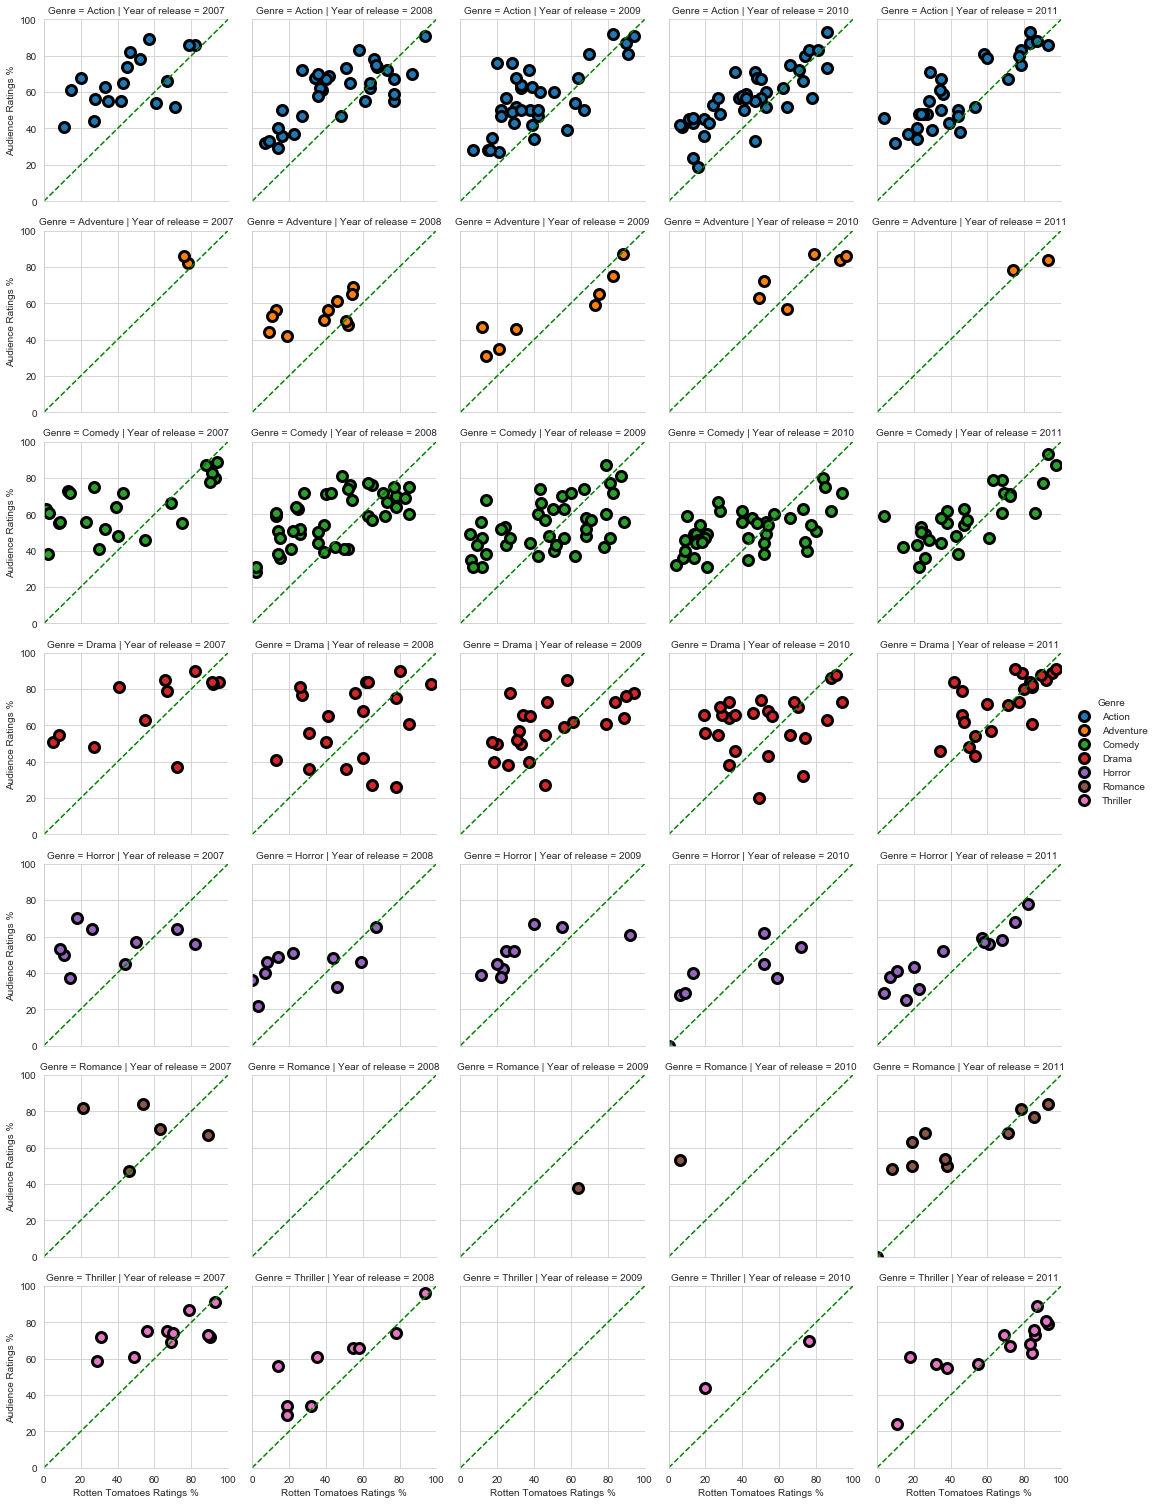

In [325]:
sns.set_style('whitegrid')
facetGrid = sns.FacetGrid(movies, row='Genre', col='Year of release', hue='Genre')
kws = dict(s=100, linewidth=3, edgeColor='Black')
facetGrid.set(xlim=[0,100], ylim=[0,100])

for axes in facetGrid.axes.flat:
    axes.plot((0,100), (0,100), color='green', linestyle='--')
    
facetGrid.map(plt.scatter, 'Rotten Tomatoes Ratings %', 'Audience Ratings %', **kws)
facetGrid.add_legend()
plt.show()